In [1]:
#Importing required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
ls

 Volume in drive F is CS
 Volume Serial Number is 2CB6-9105

 Directory of F:\PathToDL\DataAnalysis

04/25/2020  02:42 PM    <DIR>          .
04/25/2020  02:42 PM    <DIR>          ..
04/25/2020  10:12 AM    <DIR>          .ipynb_checkpoints
11/29/2015  09:38 AM           884,736 chinook.db
04/25/2020  10:21 AM           138,900 Hello World!.ipynb
04/25/2020  02:01 PM         5,824,512 sakila.db
04/25/2020  08:58 AM        15,240,280 sales_data.csv
04/25/2020  02:42 PM            44,452 Working with SQL database.ipynb
               5 File(s)     22,132,880 bytes
               3 Dir(s)  119,400,673,280 bytes free


In [3]:
#Python has a separate modules for all forms of Database Management Systems
connection = sqlite3.connect('sakila.db')

In [4]:
connection

## SQLite commands
SQL queries are beyond the scope of this series but all you need to know is:
* SELECT is used to select coloumns from their tables. Eg SELECT rental.rental_id will show rental_id from rental table
* INNER JOIN is used to link two tables, like film_id of inventory table is same with film_id of film table. So we can link the rows of both the table using INNER JOIN.

Please use google for more informations

In [5]:
sql_command = '''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
'''

In [6]:
df = pd.read_sql(sql_command, connection, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [7]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [8]:
df.shape

(16044, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
rental_date              16044 non-null datetime64[ns]
return_date              15861 non-null datetime64[ns]
customer_lastname        16044 non-null object
store_id                 16044 non-null int64
rental_store_city        16044 non-null object
film_title               16044 non-null object
film_rental_duration     16044 non-null int64
film_rental_rate         16044 non-null float64
film_replacement_cost    16044 non-null float64
film_rating              16044 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [10]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [11]:
df['film_rental_rate'].mean()

2.9426302667662574

Text(0,0.5,'Number of Rentals')

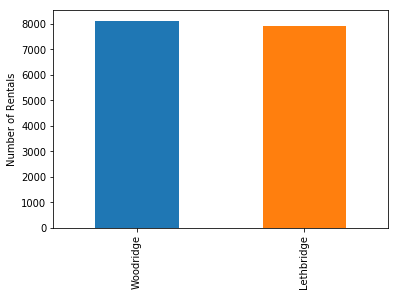

In [12]:
# Remember value_counts is used to count the different enteries.
diagram = df['rental_store_city'].value_counts().plot(kind = 'bar')
diagram.set_ylabel('Number of Rentals')

## Messing with coloums

In [13]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100

df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

In [14]:
df['rental_gain_return'].mean()

16.343824010240393

In [15]:
df['rental_gain_return'].median()

13.597089586175537

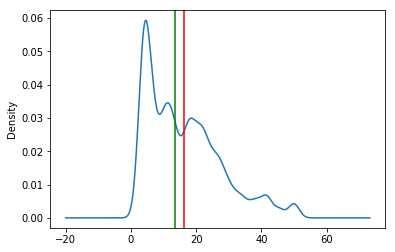

In [16]:
ax = df['rental_gain_return'].plot(kind='density')
#Mean line
ax.axvline(df['rental_gain_return'].mean(), color='red')
#Median line
ax.axvline(df['rental_gain_return'].median(), color='green')

## Selection and Indexing

In [17]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990


In [18]:
df.loc[df['film_title'] == 'BLANKET BEVERLY']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
1577,2005-06-16 04:03:28,2005-06-24 22:40:28,THRASHER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
3584,2005-07-06 04:16:43,2005-07-13 07:08:43,CASTILLO,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
4426,2005-07-07 22:28:32,2005-07-16 02:04:32,FRAZIER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
8424,2005-07-29 07:06:03,2005-08-06 12:00:03,WARREN,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
9840,2005-07-31 12:23:18,2005-08-06 15:59:18,MORRELL,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
10507,2005-08-01 11:22:20,2005-08-04 13:18:20,PHILLIPS,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
11344,2005-08-02 17:13:26,2005-08-07 16:44:26,GONZALEZ,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
11530,2005-08-17 00:29:00,2005-08-22 03:22:00,HARDISON,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.59709
